# Working with Dates in Pandas

- Pandas can easily parse dates either during import or after import
- Pandas provides 2 primary date types for working with dates and times:
    - `datetime64[ns]` represents a specific moment in time with nanosecond precision
    - `timedelta64[ns]` represents a duration, such as time period between 2 dates 

In [1]:
import pandas as pd
import numpy as np

## Basic Concepts

In [2]:
#create a date range
my_date_range = pd.date_range(start='2023-01-01', end='2024-12-31')
my_date_range

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')

In [3]:
my_date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='W')
my_date_range

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05',
               ...
               '2024-10-27', '2024-11-03', '2024-11-10', '2024-11-17',
               '2024-11-24', '2024-12-01', '2024-12-08', '2024-12-15',
               '2024-12-22', '2024-12-29'],
              dtype='datetime64[ns]', length=105, freq='W-SUN')

Parsing date 

In [4]:
dates_list = ['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05']

date_series = pd.to_datetime(dates_list)
date_series

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05'],
              dtype='datetime64[ns]', freq=None)

In case the input format is different, you can specify how it originally looks to help pandas process the information. 
e.g. for original date format '2023/01/01' then use '%Y/%m/%d'

In [5]:
dates_list = ['01/01/2023', '01/02/2023', '01/03/2023'] #US-based format

date_series = pd.to_datetime(dates_list, format='%m/%d/%Y')
date_series

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03'], dtype='datetime64[ns]', freq=None)

To view the date in a different format

In [ ]:
date_series.strftime('%b %d')

Index(['Jan 01', 'Jan 02', 'Jan 03'], dtype='object')

In [8]:
date_series.strftime('%d-%b-%y')

Index(['01-Jan-23', '02-Jan-23', '03-Jan-23'], dtype='object')

## Date Arithmetics

In [11]:
dates_list = ['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05']

dates_series = pd.to_datetime(dates_list)
dates_series

DatetimeIndex(['2023-01-01', '2023-01-08', '2023-01-15', '2023-01-22',
               '2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05'],
              dtype='datetime64[ns]', freq=None)

In [12]:
# add 3 days to the date
dates_series = dates_series + pd.Timedelta(days=3)
dates_series

DatetimeIndex(['2023-01-04', '2023-01-11', '2023-01-18', '2023-01-25',
               '2023-02-01', '2023-02-08', '2023-02-15', '2023-02-22',
               '2023-03-01', '2023-03-08'],
              dtype='datetime64[ns]', freq=None)

You can add/subtract days, months, minutes, etc...

In [14]:
date1 = pd.to_datetime('2024-03-08')
date2 = pd.to_datetime('2023-10-15')

date1 - date2

Timedelta('145 days 00:00:00')

## Date Functions

In [15]:
#extracting elements from the date
my_year = date1.year  
my_month = date1.month
my_day = date1.day
print(my_year,'\n',my_month,'\n',my_day)

2024 
 3 
 8


In [16]:
dow = date1.day_of_week
dow

4

Using `strftime()` - use this reference https://strftime.org

In [17]:
date1.strftime('%A')

'Friday'

## Exercise

In [18]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'Drug_Sales.csv')
df.head()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [19]:
df.dtypes

Date            object
Drug1          float64
Drug2          float64
Drug3          float64
Drug4          float64
Drug5          float64
Drug6          float64
Drug7          float64
Drug8          float64
Drug1_Sales    float64
Drug2_Sales    float64
Drug3_Sales    float64
Drug4_Sales    float64
Drug5_Sales    float64
Drug6_Sales    float64
Drug7_Sales    float64
Drug8_Sales    float64
dtype: object

We have 2 methods to parse dates in pandas:
- Method1 (easier): importing the data using `parse_dates`
- Method2: after importing, use `to_datetime()`

In [23]:
df = pd.read_csv(path+'Drug_Sales.csv', parse_dates=['Date'])
df.dtypes

Date           datetime64[ns]
Drug1                 float64
Drug2                 float64
Drug3                 float64
Drug4                 float64
Drug5                 float64
Drug6                 float64
Drug7                 float64
Drug8                 float64
Drug1_Sales           float64
Drug2_Sales           float64
Drug3_Sales           float64
Drug4_Sales           float64
Drug5_Sales           float64
Drug6_Sales           float64
Drug7_Sales           float64
Drug8_Sales           float64
dtype: object

## Feature Extraction
- After converting the date column to datetime, we're able to run date functions
- It's best practice to extract year, month, day (if needed) also place them next to the dates

In [24]:
#df['Month'] = df['Date'].dt.month
df.insert(1, 'Year', df['Date'].dt.year)
df.insert(2, 'Month', df['Date'].dt.month)
df.insert(3, 'Day', df['Date'].dt.day)
df.head()

,Date,Year,Month,Day,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2019,9,1,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,2019,9,2,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,2019,9,3,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [ ]:
df.columns.get_loc('Date')

0

In [28]:
df.insert(4, 'DayName', df['Date'].dt.strftime('%a'))
df.head()

,Date,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,...,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2019,9,1,Sun,2.00,4.360,5.00,17.000,8.2,...,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,...,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,...,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,...,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,...,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


### Date Filtering

In [29]:
my_filter = (df['Date']>'2019-09-01')&(df['Date']<'2019-09-14')

df_filtered = df[my_filter]
df_filtered

,Date,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,...,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
1,2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,...,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,...,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,...,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,...,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0
5,2019-09-06,2019,9,6,Fri,1.68,2.670,1.00,28.400,7.0,...,0.0,1.5,1680.0,2136.0,1500.0,17040.0,3850.0,0.0,0.0,1350.0
6,2019-09-07,2019,9,7,Sat,8.33,3.670,2.00,27.000,14.0,...,6.0,2.0,8330.0,2936.0,3000.0,16200.0,7700.0,30000.0,2700.0,1800.0
7,2019-09-08,2019,9,8,Sun,7.01,6.087,3.00,26.000,7.0,...,3.0,3.0,7010.0,4869.6,4500.0,15600.0,3850.0,0.0,1350.0,2700.0
8,2019-09-09,2019,9,9,Mon,1.18,2.124,3.00,26.000,4.0,...,5.0,2.0,1180.0,1699.2,4500.0,15600.0,2200.0,30000.0,2250.0,1800.0
9,2019-09-10,2019,9,10,Tue,8.66,6.680,4.20,22.000,17.0,...,1.0,1.0,8660.0,5344.0,6300.0,13200.0,9350.0,0.0,450.0,900.0
10,2019-09-11,2019,9,11,Wed,2.67,5.076,3.00,42.000,5.0,...,5.0,2.5,2670.0,4060.8,4500.0,25200.0,2750.0,0.0,2250.0,2250.0


## Data Aggregation
- If you already have date parts extracted, you can use functions like `groupby()` or `pivot_table()`
- Otherwise, you can use `resample()` to bundle dates by month, week, etc...

Example: Get total sales for drug1 by day

In [30]:
df.groupby('DayName')[['Drug1']].sum()

,Drug1
DayName,
Fri,18.02
Mon,23.18
Sat,35.00
Sun,21.19
Thu,22.16
Tue,24.52
Wed,17.00


<Axes: ylabel='DayName'>

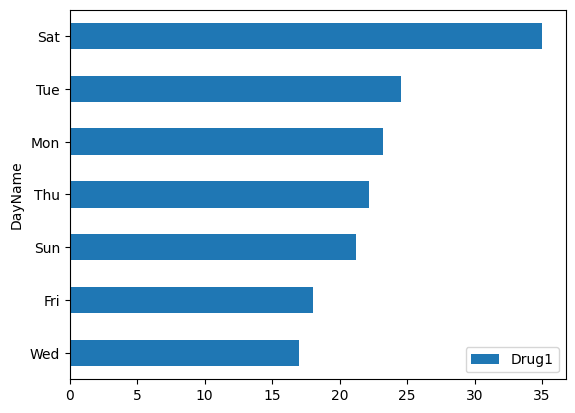

In [36]:
df.groupby('DayName')[['Drug1']].sum().sort_values(by='Drug1', ascending=True).plot(kind='barh')

To use `resample()` we need to convert the date into an index

In [37]:
df.set_index('Date', drop=True, inplace=True) #drop true removes the original Date column
df.head()

,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,,,,,
2019-09-01,2019,9,1,Sun,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [38]:
weekly_sum = df.drop(columns=['Year','Day','Month','DayName']).resample('W').sum()
weekly_sum.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.000000,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
2019-09-08,40.71,26.767,15.75,154.755,51.0,6.0,15.000000,28.5,40710.0,21413.6,23625.0,92853.0,28050.0,60000.0,6750.0,25650.0
2019-09-15,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.5,35510.0,24781.6,29475.0,107025.0,36960.0,50000.0,13500.0,27450.0
2019-09-22,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.0,46840.0,20316.8,36600.0,148950.0,17160.0,30000.0,11700.0,18900.0
2019-09-29,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.1,34010.0,17998.4,39900.0,202020.0,33660.0,10000.0,18187.5,20790.0


<Axes: xlabel='Date'>

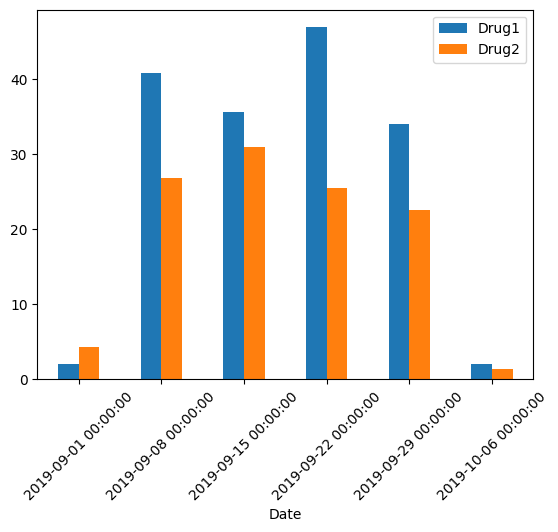

In [40]:
weekly_sum[['Drug1','Drug2']].plot(kind='bar', rot=45)

- Drug 1 sales are higher, except for the first week of Sep
- Drug 1 and Drug 2 sales start increasing during the middle of the month

In [41]:
df['FirstWeekofMonth'] = df['Day'] <= 7
df.head()

,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,...,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales,FirstWeekofMonth
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-01,2019,9,1,Sun,2.00,4.360,5.00,17.000,8.2,1.0,...,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0,True
2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,0.0,...,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0,True
2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,3.0,...,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0,True
2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,0.0,...,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0,True
2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,0.0,...,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0,True
